### **To reduce the storage space, we convert the previous downloaded float32 data to x100 int16 data.**



In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
import shutil
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
from utils.transform_xy import coor2coor, imagexy2geo, geo2imagexy
import glob


In [29]:
dir_as = config.root_tb_data + '/tibet-202002/s1_ascend'
path_as = sorted(glob.glob(dir_as + '/*'))
dir_des = config.root_tb_data + '/tibet-202002/s1_descend'
path_des = sorted(glob.glob(dir_des + '/*'))
len(path_as)


321

In [30]:
as_num = [int(path[-7:-4]) for path in path_as]


In [31]:
### find the missing tiles
for i in range(321):
  j = i+1
  if j in as_num:
    pass
  else:
    print('missing:', j)


In [3]:
idx = 1
s1_img, s1_img_info = readTiff(path_in=path_des[idx])
print(s1_img_info)


{'geoextent': (92.49808750133253, 93.74432029499155, 25.887380363171133, 27.00677103871247), 'geotrans': (92.49808750133253, 8.983152841195215e-05, 0.0, 27.00677103871247, 0.0, -8.983152841195215e-05), 'geosrs': '4326', 'row': 12461, 'col': 13873, 'bands': 2}


In [20]:
for i, path in enumerate(path_as):
    print('input image:', i+1)
    # size = os.path.getsize(path)/1000000
    s1_img, s1_info = readTiff(path_in=path)
    if s1_img.dtype.name == 'float32':
    # if size > 1000:
        path_new = path.split('/')[-1].split('.')[0] + '_int16.tif'
        path_new = '/'.join(path.split('/')[:-1]) + '/' + path_new
        s1_img_new = np.int16(s1_img * 100)
        print('out_path:',path_new)
        writeTiff(im_data = s1_img_new, 
            im_geotrans = s1_info['geotrans'], 
            im_geosrs = s1_info['geosrs'], 
            path_out = path_new)
    else: 
        print('input not need converting')



input image: 1
out_path: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_001_int16.tif
input image: 2
out_path: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_002_int16.tif
input image: 3
out_path: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_003_int16.tif
input image: 4
out_path: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_004_int16.tif
input image: 5
out_path: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_005_int16.tif
input image: 6


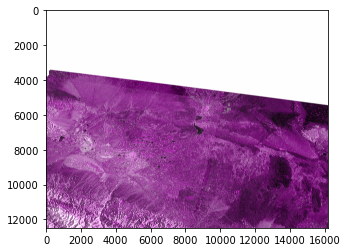

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
imgShow(s1_img, color_bands=(0,1,0), clip_percent=2)


### **Move the previous float32 files and rename the int16 files**

In [9]:
## move files to tmp directory
## note the ascending or descending name
### 1. creat tmp directory
dir_target = dir_as + '/tmp_float32'
if not os.path.exists(dir_target):
    os.mkdir(dir_target)

### 2. move the float32 file to tmp directory
for path in path_as:
    path_new = path.split('/')[-1].split('.')[0] + '_int16.tif'
    path_new = '/'.join(path.split('/')[:-1]) + '/' + path_new
    if os.path.exists(path_new):
        print(path, '->', dir_target)
        # shutil.move(path, dir_target)


/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_001.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_002.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_003.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_004.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_005.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_006.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_007.tif -> /myDrive/tibet-water/tibet-202004/s1_ascend/tmp_float32
/myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_

In [12]:
## rename files
## note the ascending or descending name
path_des = sorted(glob.glob(dir_des + '/*'))
for path in path_as:
    if 'int16' in path:
        print('old name:', path)
        path_new = path.replace('_int16','')
        print('new name:', path_new)
        # os.rename(path, path_new)


old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_001_int16.tif
new name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_001.tif
old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_002_int16.tif
new name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_002.tif
old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_003_int16.tif
new name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_003.tif
old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_004_int16.tif
new name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_004.tif
old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_005_int16.tif
new name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_005.tif
old name: /myDrive/tibet-water/tibet-202004/s1_ascend/tibet_s1as_202004_tile_006_int16.tif
new name: /myDrive/tibet-wate